In [75]:
from sklearn import svm
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split 

In [141]:
import pandas as pd
output_path = '/Users/Hesham/dev/fluffDecoder/data/'
p = pd.read_csv(output_path + 'ST-1233329802_3.0.csv')

In [142]:
p = p.drop(['date', 'window'], axis=1).astype(float)


In [144]:
# y = p[['phq_1']]
# t1, t2 = train_test_split(p, stratify=y, test_size=0.5, random_state=42, shuffle=True)

In [145]:
len(t1.index)

61042

In [146]:
# train_set, test_set = train_test_split(p, test_size=0.25, random_state=42, shuffle=True)

In [147]:
y = p[['phq_1']]
train_set_st, test_set_st = train_test_split(p, stratify=y, test_size=0.25, random_state=42, shuffle=True)

In [148]:
X_train_st = train_set_st.loc[:,'accX':'work_time']
y_train_st_1 = train_set_st.loc[:, ['phq_1']].values.ravel()
y_train_st_2 = train_set_st.loc[:, ['phq_2']].values.ravel()

X_test_st = test_set_st.loc[:,'accX':'work_time']
y_test_st_1 = test_set_st[['phq_1']].values.ravel()
y_test_st_2 = test_set_st[['phq_2']].values.ravel()

In [149]:
X_train = train_set.loc[:,'accX':'work_time']
y_train_1 = train_set.loc[:, ['phq_1']].values.ravel()
y_train_2 = train_set.loc[:, ['phq_2']].values.ravel()

X_test = test_set.loc[:,'accX':'work_time']
y_test_1 = test_set[['phq_1']].values.ravel()
y_test_2 = test_set[['phq_2']].values.ravel()

In [219]:
X_train_st.columns

Index(['accX', 'accX_std', 'accY', 'accY_std', 'accZ', 'accZ_std', 'gyrX',
       'gyrX_std', 'gyrY', 'gyrY_std', 'gyrZ', 'gyrZ_std', 'heartR',
       'heartR_std', 'AirTemperature', 'AT_std', 'PlethysmogramGreen',
       'ple_std', 'mood', 'tense', 'tired', 'rumination', 'socialize',
       'socialize_val', 'work_time'],
      dtype='object')

In [150]:
time = train_set[['time']].values.ravel()
time_test = test_set[['time']].values.ravel()

In [151]:
time_st = train_set_st[['time']].values.ravel()
time_st_test = test_set_st[['time']].values.ravel()

In [152]:
# Scaling the Train and Test feature set 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [153]:
# Scaling the Train and Test feature set 
from sklearn.preprocessing import StandardScaler
scaler_st = StandardScaler()
X_train_st_scaled = scaler_st.fit_transform(X_train_st)
X_test_st_scaled = scaler_st.transform(X_test_st)

In [154]:
parameters = {'epsilon':[0,0.1,0.2,0.5,1],
               'tol':[1e-1, 1e-3,1e-5],
              'C':[1, 1.5, 10, 50]
              }

In [155]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVR

svr = LinearSVR(random_state=42)
regressor_st = GridSearchCV(svr, parameters, n_jobs=-1, cv=3, scoring='neg_mean_absolute_error')
regressor_st

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=42, tol=0.0001, verbose=0),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'epsilon': [0, 0.1, 0.2, 0.5, 1], 'tol': [0.1, 0.001, 1e-05], 'C': [1, 1.5, 10, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=0)

In [131]:
regressor_st.fit(X_train_st_scaled, y_train_st_1)

/Users/Hesham/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=42, tol=0.0001, verbose=0),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'epsilon': [0, 0.1, 0.2, 0.5, 1], 'tol': [0.1, 0.001, 1e-05], 'C': [1, 1.5, 10, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=0)

In [132]:
regressor_st.best_params_

{'C': 1, 'epsilon': 0, 'tol': 0.001}

In [133]:
regressor_st.best_estimator_

LinearSVR(C=1, dual=True, epsilon=0, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=42, tol=0.001, verbose=0)

In [134]:
from sklearn.metrics import mean_absolute_error

pred_test_st = regressor_st.predict(X_test_st_scaled)
svr_mae = mean_absolute_error(y_test_st_1,pred_test_st)
svr_mae

1.0564320046319216

In [135]:
pred_train_st = regressor_st.predict(X_train_st_scaled)
svr_mae = mean_absolute_error(y_train_st_1, pred_train_st)
svr_mae

1.0559219030823357

In [203]:
model = regressor_st.best_estimator_

In [205]:
model.coef_

array([-8.01549339e-02,  1.17975844e-02, -1.09961620e-02, -2.22833721e-03,
       -8.02851507e-03, -2.22833721e-03,  3.78184455e-04,  4.69264912e-02,
       -6.76195450e-03, -2.51249463e-02,  9.39656949e-03, -9.71845086e-03,
        1.37583303e-02,  1.01929008e-02,  1.08348298e+00, -3.25809305e-01,
        2.28175697e+00,  6.64176857e-03,  2.58816527e-02, -5.18981877e-03,
        1.17576307e+00,  3.51558104e-01,  1.11619977e-02, -8.49214719e-03,
       -2.09415360e-01, -2.87548505e-01, -3.00845307e-01,  1.71046066e+00,
       -1.82223611e-01, -3.08074189e-01, -2.24261749e-02])

In [137]:
cvrs = regressor_st.cv_results_
for mean_score, params in zip(cvrs['mean_train_score'], cvrs['params']):
#     print(mean_score, params)

SyntaxError: unexpected EOF while parsing (<ipython-input-137-4f5e15d2ba2b>, line 3)

In [164]:
svr = LinearSVR(random_state=42, tol=0.001)
svr.fit(X_train_st_scaled, y_train_st_1)

/Users/Hesham/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=42, tol=0.001, verbose=0)

In [165]:
pred_test_st = svr.predict(X_test_st_scaled)
svr_mae = mean_absolute_error(y_test_st_1,pred_test_st)
svr_mae

1.0559380484572574

In [166]:
pred_train_st = svr.predict(X_train_st_scaled)
svr_mae = mean_absolute_error(y_train_st_1, pred_train_st)
svr_mae

1.0545821170767868

In [317]:
svr.coef_

array([ 0.05571399, -0.00443946, -0.02033014, -0.00920982, -0.03340014,
       -0.00920982, -0.01900075,  0.01790638,  0.03504433,  0.0081345 ,
        0.01635233, -0.01303781, -0.00528655, -0.02406242,  0.0359599 ,
        0.19650424,  0.10673818, -0.01165276, -0.22170621, -0.00287365,
        0.07775748,  0.07259547, -0.10689036, -0.18726774, -0.08553222])

In [318]:
def display_scores(score):
    print('scores:', score)
    print('Mean:', score.mean())
    print('std dev:', score.std())

In [319]:
from sklearn.model_selection import cross_val_score
svm_scores = cross_val_score(svr, X_train_st_scaled, y_train_st_1,scoring="neg_mean_absolute_error", cv=4)
display_scores(-svm_scores)

/Users/Hesham/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/Hesham/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


scores: [1.04415788 1.05941351 1.05950218 1.05615119]
Mean: 1.0548061871709082
std dev: 0.0062943477127878015


/Users/Hesham/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [173]:
temp = p.columns[1:-2]

In [174]:
coef = svr.coef_
for c, col in zip(coef, temp):
    print(c, col)

0.05571398566114234 accX
-0.004439455226852797 accX_std
-0.02033013614277791 accY
-0.00920982060662699 accY_std
-0.03340013918050161 accZ
-0.00920982060662699 accZ_std
-0.01900074822553847 gyrX
0.01790638171260193 gyrX_std
0.03504433398077497 gyrY
0.008134500722921142 gyrY_std
0.016352328026602046 gyrZ
-0.013037806045990167 gyrZ_std
-0.005286550337935084 heartR
-0.024062416671278442 heartR_std
0.03595990304021669 AirTemperature
0.19650424499211405 AT_std
0.1067381792309155 PlethysmogramGreen
-0.011652756471723898 ple_std
-0.22170620552658332 mood
-0.002873654063368289 tense
0.0777574755271051 tired
0.07259547023150338 rumination
-0.10689036298972487 socialize
-0.1872677394330217 socialize_val
-0.08553221779511383 work_time


In [ ]:
accX 0.0
accX_std 0.0
accY 0.0
accY_std 0.0
accZ 0.0
accZ_std 0.0
gyrX 0.0
gyrX_std 0.0
gyrY 0.0
gyrY_std 0.0
gyrZ 0.0
gyrZ_std 0.0
heartR 0.0
heartR_std 0.0
AirTemperature 0.034796843062099445
AT_std 0.00121961406353288
PlethysmogramGreen 0.0
ple_std 0.011646652767346562
mood 0.10134463863422376
tense 0.08226612531592088
tired 0.05169078949598518
rumination 0.04121590149505671
socialize 0.2335790344225581
socialize_val 0.15383240833387377
work_time 0.2884079924094024

In [175]:
patient = train_set_st.copy()

In [176]:
patient.columns

Index(['time', 'accX', 'accX_std', 'accY', 'accY_std', 'accZ', 'accZ_std',
       'gyrX', 'gyrX_std', 'gyrY', 'gyrY_std', 'gyrZ', 'gyrZ_std', 'heartR',
       'heartR_std', 'AirTemperature', 'AT_std', 'PlethysmogramGreen',
       'ple_std', 'mood', 'tense', 'tired', 'rumination', 'socialize',
       'socialize_val', 'work_time', 'phq_1', 'phq_2'],
      dtype='object')

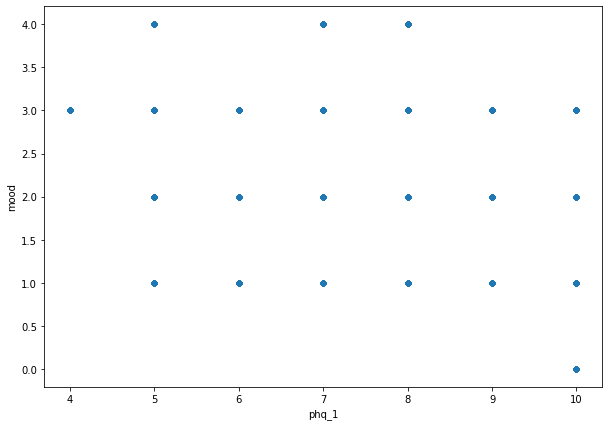

In [181]:
patient.plot(kind='scatter', x='phq_1', y='mood', figsize=(10,7))

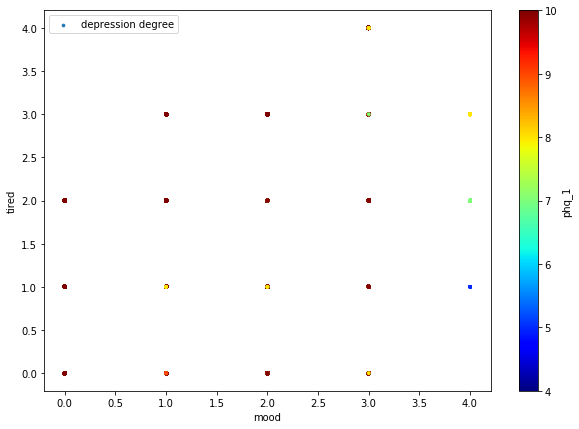

In [209]:
patient.plot(kind='scatter', x='mood', y='tired', s=patient['phq_1'], label='depression degree', 
             c='phq_1', cmap=pyplot.get_cmap('jet'), colorbar=True, figsize=(10,7), sharex=False)

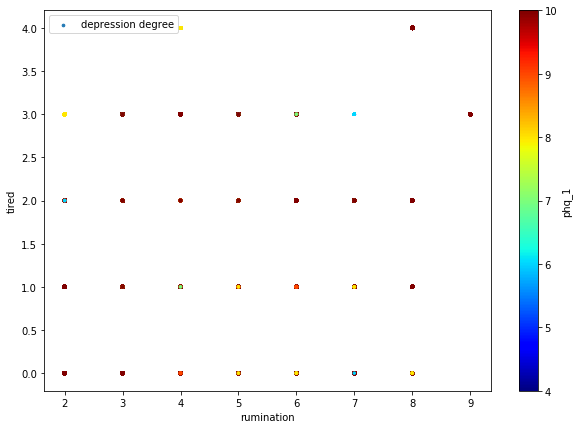

In [324]:
patient.plot(kind='scatter', x='rumination', y='tired', s=patient['phq_1'], label='depression degree', 
             c='phq_1', cmap=pyplot.get_cmap('jet'), colorbar=True, figsize=(10,7), sharex=False)

In [179]:
corr_matrix = patient.corr()

In [180]:
corr_matrix['phq_1'].sort_values(ascending=False)

phq_1                 1.000000
phq_2                 0.331387
AT_std                0.081969
rumination            0.068428
PlethysmogramGreen    0.066239
AirTemperature        0.053627
accX                  0.050517
heartR                0.044203
tense                 0.039724
socialize             0.017638
work_time             0.016231
gyrZ                  0.010403
gyrY                  0.002042
gyrX                  0.000252
ple_std              -0.002555
tired                -0.016686
heartR_std           -0.018105
gyrX_std             -0.018739
gyrY_std             -0.019922
gyrZ_std             -0.021582
accY                 -0.022041
accX_std             -0.024678
accZ_std             -0.025287
accY_std             -0.025287
accZ                 -0.028495
time                 -0.115062
socialize_val        -0.124167
mood                 -0.232790
Name: phq_1, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x139900ef0>,
      dtype=object)

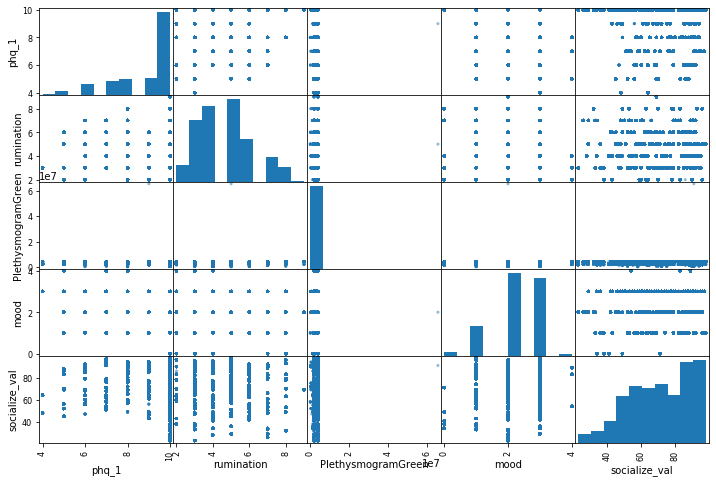

In [207]:
from pandas.plotting import scatter_matrix
attributes = ['phq_1', 'rumination', 'PlethysmogramGreen', 'mood', 'socialize_val']
scatter_matrix(patient[attributes], figsize=(12, 8))

In [183]:
socialise_scaled = scaler_st.fit_transform(test_set_st[['socialize']])
socialize_val_scaled = scaler_st.fit_transform(test_set_st[['socialize_val']])
work_time_scaled = scaler_st.fit_transform(test_set_st[['work_time']])
mood_scaled = scaler_st.fit_transform(test_set_st[['mood']])
tense_scaled = scaler_st.fit_transform(test_set_st[['tense']])

In [187]:
time_sorted = time_st_test
time_sorted.sort()

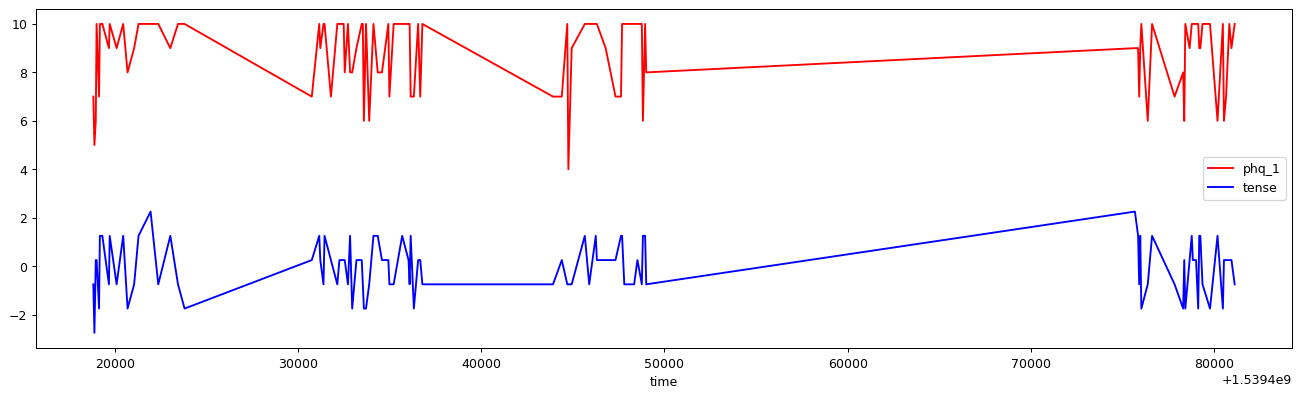

In [322]:
from matplotlib import pyplot
%matplotlib inline
s = 1000
e = 1100
xaxis = time_sorted[s:e]
yaxis = y_test_st_1[s:e]
yaxis2 = pred_test_st[s:e]
yaxis3 = socialise_scaled[s:e]
yaxis4 = socialize_val_scaled[s:e]
yaxis5 = work_time_scaled[s:e]
yaxis6 = mood_scaled[s:e]
yaxis7 = tense_scaled[s:e]

# avg = p[['phq_1', 'phq_2']].mean(axis=1)
fig=pyplot.figure(figsize=(18, 5), dpi= 90, facecolor='w', edgecolor='k')
pyplot.plot(xaxis, yaxis, color='red', label='phq_1')
# pyplot.plot(xaxis, yaxis2, color='blue', label='prediction')
# pyplot.plot(xaxis, yaxis3, color='green', label='socialize')
# pyplot.plot(xaxis, yaxis4, color='cyan', label='socialize_val')
# pyplot.plot(xaxis, yaxis5, color='magenta', label='sport_time')
# pyplot.plot(xaxis, yaxis6, color='black', label='mood')
pyplot.plot(xaxis, yaxis7, color='blue', label='tense')
# plt.ylabel('some numbers')
pyplot.xlabel('time')

pyplot.legend()
# pyplot.plot(xaxis, avg, color='green', label='avg')

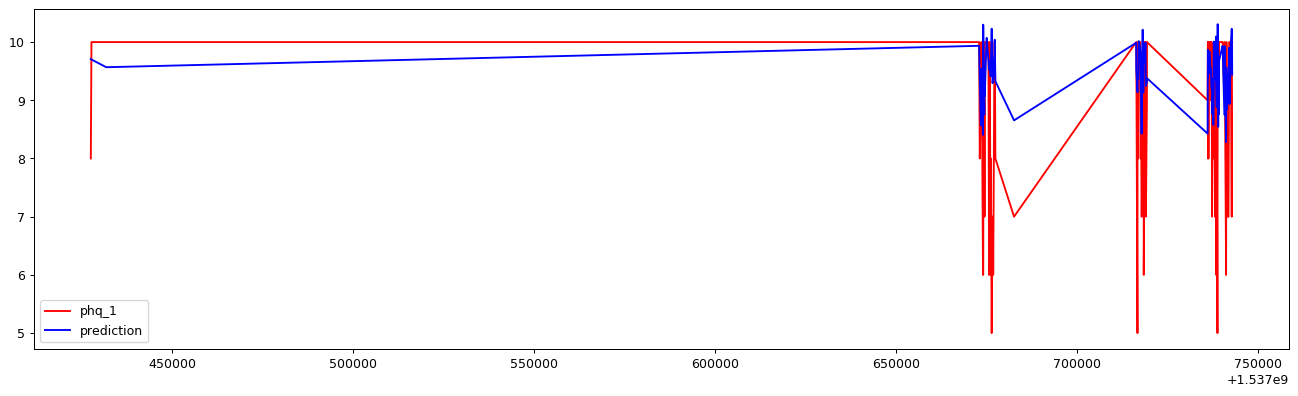

In [196]:
from matplotlib import pyplot
%matplotlib inline
xaxis = time_st_test[:100]
yaxis = y_test_st_1[:100]
yaxis2 = pred_test_st[:100]
# avg = p[['phq_1', 'phq_2']].mean(axis=1)
fig=pyplot.figure(figsize=(18, 5), dpi= 90, facecolor='w', edgecolor='k')
pyplot.plot(xaxis, yaxis, color='red', label='phq_1')
pyplot.plot(xaxis, yaxis2, color='blue', label='prediction')
pyplot.legend()
# pyplot.plot(xaxis, avg, color='green', label='avg')

In [306]:
p_802 = [ 0.05571399, -0.00443946, -0.02033014, -0.00920982,
         -0.03340014, -0.00920982, -0.01900075,  0.01790638,
          0.03504433,  0.0081345 , 0.01635233, -0.01303781,
         -0.00528655, -0.02406242,0,0, 0.0359599, 0.19650424,0,0,
         0.10673818, -0.01165276,0,0, -0.22170621, -0.00287365,
         0.07775748,0,  0.07259547, -0.10689036, -0.18726774, 0,
         -0.08553222]
col_802 = ['accX', 'accX_std', 'accY', 'accY_std',
           'accZ', 'accZ_std', 'gyrX', 'gyrX_std',
           'gyrY', 'gyrY_std', 'gyrZ', 'gyrZ_std',
           'heartR', 'heartR_std', 'SmoothedAirPressure', 'SAP_std', 'AirTemperature', 'AT_std',
           'AirPressure', 'AP_std','PlethysmogramGreen', 'ple_std','alc', 'cig', 'mood', 'tense',
           'tired','period', 'rumination', 'socialize','socialize_val', 'sport_time',
           'work_time']
print(len(p_802), len(col_802))

p_385 = [-3.37888575e-02, -6.25345109e-02,  6.48127895e-02, -2.75426218e-02,
       -5.18775470e-02, -2.75426218e-02, -2.61660666e-03, -6.67189495e-02,
       -1.29340087e-02,  1.03811585e-01, -2.68441116e-04, -5.18383809e-02,
        9.73356052e-04,  8.20536690e-04, -2.43820795e-01, -2.31232898e-01,
        -1.92823983e-01,  2.16335450e-02, 1.14101722e-01,  1.98194635e-01,
         1.92537381e-01,  1.10279837e-01, -3.74692209e-02,0, -3.01450845e-01,
         -7.86294563e-01,  9.05977133e-02, 0, -2.51510844e-01,
         -3.94589889e-01, -3.37102708e-01, -1.16002469e-01,
         -1.23048437e-01]
col_385 = ['accX', 'accX_std', 'accY', 'accY_std',
           'accZ', 'accZ_std', 'gyrX', 'gyrX_std',
           'gyrY', 'gyrY_std', 'gyrZ', 'gyrZ_std',
           'heartR', 'heartR_std', 'SmoothedAirPressure', 'SAP_std',
            'AirTemperature', 'AT_std', 'AirPressure', 'AP_std',
           'PlethysmogramGreen', 'ple_std', 'alc', 'cig',
           'mood', 'tense', 'tired', 'period',
           'rumination', 'socialize','socialize_val','sport_time',
           'work_time']
print(len(p_385), len(col_385))

p_707 = [-8.01549339e-02,  1.17975844e-02, -1.09961620e-02, -2.22833721e-03,
       -8.02851507e-03, -2.22833721e-03,  3.78184455e-04,  4.69264912e-02,
       -6.76195450e-03, -2.51249463e-02,  9.39656949e-03, -9.71845086e-03,
        1.37583303e-02,  1.01929008e-02,  1.08348298e+00, -3.25809305e-01,
        2.58816527e-02, -5.18981877e-03, 1.17576307e+00,  3.51558104e-01,
        1.11619977e-02, -8.49214719e-03,0,0, -2.09415360e-01, -2.87548505e-01,
        -3.00845307e-01, 0,   1.71046066e+00, -1.82223611e-01, -3.08074189e-01,
         -2.24261749e-02, 0]
col_707 = ['accX', 'accX_std', 'accY', 'accY_std',
           'accZ', 'accZ_std', 'gyrX', 'gyrX_std',
           'gyrY', 'gyrY_std', 'gyrZ', 'gyrZ_std',
           'heartR', 'heartR_std', 'SmoothedAirPressure', 'SAP_std',
        'AirTemperature', 'AT_std', 'AirPressure', 'AP_std',
           'PlethysmogramGreen', 'ple_std','alc','cig', 'mood', 'tense',
           'tired','period' ,'rumination', 'socialize', 'socialize_val',
           'sport_time', 'work_time']
print(len(p_707), len(col_707))




p_440 = [ 1.26923776e-02, -3.11759928e-02,  1.60089682e-02,  6.19537928e-03,
       -1.59039070e-03,  6.19537928e-03, -1.14298899e-02, -7.67728365e-02,
        3.54977533e-02, -9.01069810e-04,  8.30709380e-04,  6.03938357e-02,
        5.13069052e-02,  1.22303438e-02,0,0,  8.25508052e-02,  2.56062163e-02,
        2.13223644e-02,  1.81319047e-02, -2.02972265e-01,  1.98282446e-02,
       -3.05845803e-02,  1.17144638e-01, -1.84984509e-01, -1.84112381e-01,
        6.54557324e-02,0,  1.97092763e+00, -1.71859545e-01,  1.74769541e-01,
       -4.19060698e-02,  1.25691048e-01]
col_440 = ['accX', 'accX_std', 'accY', 'accY_std',
           'accZ', 'accZ_std', 'gyrX', 'gyrX_std',
           'gyrY', 'gyrY_std', 'gyrZ', 'gyrZ_std',
           'heartR', 'heartR_std', 'SmoothedAirPressure', 'SAP_std', 'AirTemperature', 'AT_std',
           'AirPressure', 'AP_std', 'PleGreen', 'ple_std',
           'alc', 'cig', 'mood', 'tense',
           'tired', 'period','rumination', 'socialize', 'socialize_val',
           'sport_time', 'work_time']
print(len(p_440), len(col_440))




p_269 = [-0.02477377, -0.01005535, -0.01033519,  0.02772651,
         -0.00344182, 0.02772651, -0.01724052, -0.03320568,
         -0.02449658,  0.00361274, -0.00317472, -0.03227624,
         -0.0786224, 0.0171121 ,0,0, -0.16656135, 0.02450968,
         -0.02818772,  0.00130163, -0.04109102, -0.00210225,
       -0.08843782,  0.03276362, -0.79831237,  0.20418064,
         0.00800336, 0.11781184,  0.49926571,  0.17982042,
         -0.19853483, -0.3067323, 0.0 ]
col_269 = ['aX', 'aX_s', 'aY', 'aY_s',
           'aZ', 'aZ_s', 'gX', 'gX_s',
           'gY', 'gY_s', 'gZ', 'gZ_s',
           'h', 'h_s', 'P','P_s','T', 'T_s',
           'AP', 'AP_s', 'Pl', 'pl_s',
           'alc', 'cig', 'mo', 'te',
           'tir', 'per', 'rum', 'soc',
           'soc_v', 's_t', 'w_t']
print(len(p_269), len(col_269))


33 33
33 33
33 33
33 33
33 33


In [310]:
average = []
new_cols = []
for i1, i2, i3, i4, i5, col in zip(p_802, p_269, p_385, p_707, p_440, col_440):
    if col in ['SmoothedAirPressure', 'SAP_std']:
        pass
    else:
        avg = (i1 + i2 + i3 + i4 + i5) / 5
        average.append(abs(avg))
        new_cols.append(col)
        # avg = (abs(i1) + abs(i2) + abs(i3) + abs(i4) + abs(i5)) / 5
        print("'" + str(col) + "'" + ': ' + str(avg) + ', ')

'accX': -0.014062238760000002, 
'accX_std': -0.01928154586, 
'accY': 0.00783205314, 
'accY_std': -0.0010117779460000003, 
'accZ': -0.019667682554, 
'accZ_std': -0.0010117779460000003, 
'gyrX': -0.009981916421000001, 
'gyrX_std': -0.022372918959999998, 
'gyrY': 0.005269908019999999, 
'gyrY_std': 0.017906561778, 
'gyrZ': 0.004627289550800001, 
'gyrZ_std': -0.009295409212000002, 
'heartR': -0.0035740716896, 
'heartR_std': 0.0032586922579999995, 
'AirTemperature': -0.042998595020000016, 
'AT_std': 0.05261277250600001, 
'AirPressure': 0.25659988728, 
'AP_std': 0.11383725474000002, 
'PleGreen': 0.013274854739999991, 
'ple_std': 0.021572184882000002, 
'alc': -0.031298324239999994, 
'cig': 0.0299816516, 
'mood': -0.34317385879999995, 
'tense': -0.2113296918, 
'tired': -0.011806204260000003, 
'period': 0.023562368, 
'rumination': 0.8003477252, 
'socialize': -0.135148597, 
'socialize_val': -0.17124198519999997, 
'sport_time': -0.09741340274, 
'work_time': -0.0165779218, 


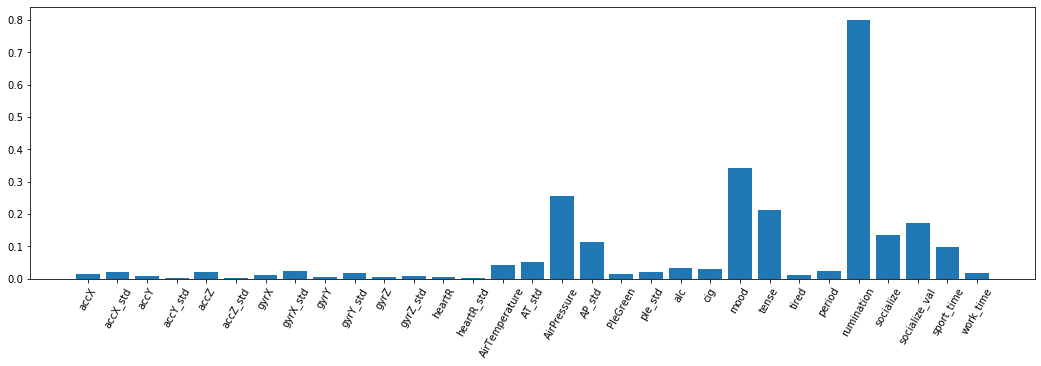

In [316]:
# Make a fake dataset
height = average
bars = new_cols
y_pos = np.arange(len(bars))

fig = plt.figure(figsize=(18, 5))
plt.bar(y_pos, height)
plt.xticks(y_pos, bars, rotation=60)
# plt.show()
plt.savefig("svm.png")

In [320]:
len(height)

31